In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
df=pd.read_csv('covid-19(India).csv')
#df['Date']=pd.to_datetime(df.Date)
#df.sort_values(by='Date')
dt=df.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
dt['confirmed']=dt['Infected'].cumsum()
dt

,Date,Infected,confirmed
0,03-02-2020,3,3
1,02-03-2020,2,5
2,03-03-2020,2,7
3,04-03-2020,20,27
4,05-03-2020,1,28
...,...,...,...
89,01-06-2020,8773,199172
90,02-06-2020,9300,208472
91,03-06-2020,8335,216807
92,04-06-2020,9915,226722


In [5]:
dt['days']=np.arange(0, len(dt), 1)
data=dt[['days', 'confirmed']]
data

,days,confirmed
0,0,3
1,1,5
2,2,7
3,3,27
4,4,28
...,...,...
89,89,199172
90,90,208472
91,91,216807
92,92,226722


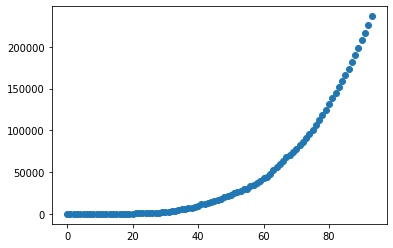

In [6]:
plt.scatter(data['days'], data['confirmed'])

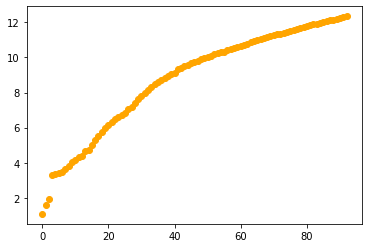

In [41]:
plt.scatter(data['days'], np.log(data['confirmed']), color='orange')

In [42]:
X, Y=np.array(data['days']).reshape(-1, 1), np.array(np.log(data['confirmed'])).reshape(-1, 1)
reg=LinearRegression()
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

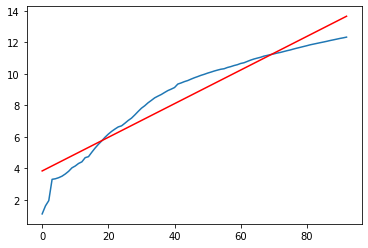

In [43]:
plt.plot(X, Y)
Y_pred=reg.predict(X)
prediction_space= ([min(X), max(X)])
plt.plot(prediction_space, [min(Y_pred), max(Y_pred)], color='red')

m=(max(Y_pred)-min(Y_pred))/(max(X)-min(X))

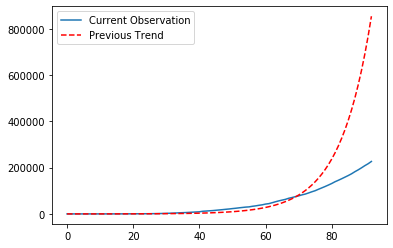

In [44]:
plt.plot(data['days'], data['confirmed'], label='Current Observation')
Y_pred=np.exp(reg.predict(X))
plt.plot(X, Y_pred, color='red', linestyle='dashed', label='Previous Trend')
plt.legend()

In [45]:
test=np.arange(len(data), len(data)+21, 1)
reg.score(X, Y)

0.9207150237443162

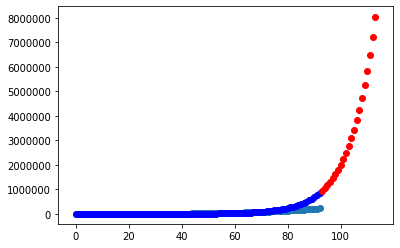

In [46]:
plt.scatter(data['days'], data['confirmed'])
Y_pred=np.exp(reg.predict(X))
plt.scatter(X, Y_pred, color='blue')
plt.scatter(test, np.exp(reg.predict(test.reshape(-1, 1))), color='red')

In [47]:
future=np.arange(len(data), len(data)+21, 1)
predictions=np.exp(reg.predict(future.reshape(-1, 1)))
future, predictions

(array([ 93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
        106, 107, 108, 109, 110, 111, 112, 113]),
 array([[ 950657.14686559],
        [1057847.59782441],
        [1177124.2070945 ],
        [1309849.73806959],
        [1457540.611246  ],
        [1621884.22968443],
        [1804758.25798799],
        [2008252.07506307],
        [2234690.64576623],
        [2486661.08417604],
        [2767042.21198158],
        [3079037.44969931],
        [3426211.41650801],
        [3812530.65686362],
        [4242408.95920527],
        [4720757.78452919],
        [5253042.38098906],
        [5845344.22564518],
        [6504430.50677427],
        [7237831.4405917 ],
        [8053926.30574779]]))

In [48]:
dt=df.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
dt['confirmed']=dt['Infected'].cumsum()
#dt=dt.iloc[4:]
dt 

,Date,Infected,confirmed
0,03-02-2020,3,3
1,02-03-2020,2,5
2,03-03-2020,2,7
3,04-03-2020,20,27
4,05-03-2020,1,28
...,...,...,...
88,31-05-2020,7985,190399
89,01-06-2020,8773,199172
90,02-06-2020,9300,208472
91,03-06-2020,8335,216807


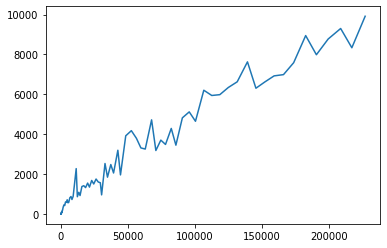

In [49]:
plt.plot(dt['confirmed'],dt['Infected'])

In [50]:
m

array([0.10683808])

In [51]:
1.0+m*14+m**2*24

array([2.76967804])

# State-Wise

In [52]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869 entries, 0 to 1868
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State           1869 non-null   object
 1   Place           1798 non-null   object
 2   Date            1869 non-null   object
 3   Time            1869 non-null   object
 4   Infected        1869 non-null   int64 
 5   Total_Infected  1869 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 87.7+ KB


In [53]:
df['State'].unique()

array(['Kerela', 'Delhi', 'Telangana', 'Rajasthan', 'Haryana',
       'Uttar Pradesh', 'Ladakh', 'Tamil Nadu', 'Jammu And Kashmir',
       'Punjab', 'Karnataka', 'Maharashtra', 'Andhra Pradesh', 'Odisha',
       'Uttarakhand', 'West Bengal', 'Pondicherry', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman And Nicobar', 'Goa',
       'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Tripura',
       'Dadra And Nagar Haveli', 'Meghalaya', 'Nagaland', 'Unassigned',
       'Sikkim'], dtype=object)

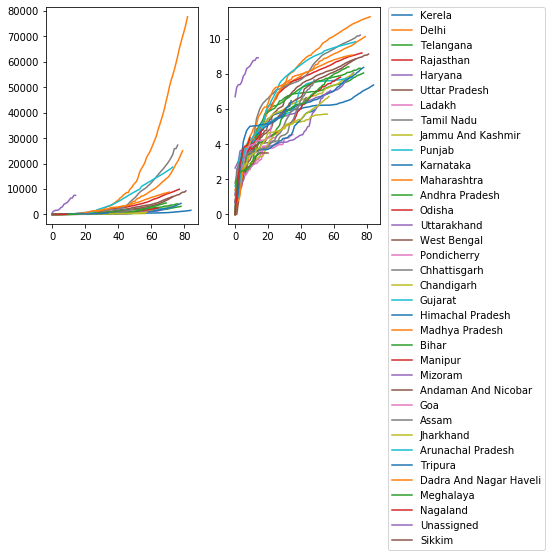

In [54]:
fig, ((ax1), (ax2))=plt.subplots(1,2)

def state(statename):
    statedata=df.loc[df['State']==statename]
    grouped=statedata.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
    grouped['confirmed']=grouped['Infected'].cumsum()
    ax1.plot(grouped.index, grouped['confirmed'], label=statename)
    #ax1.legend()
    ax2.plot(grouped.index, np.log(grouped['confirmed']), label=statename)
    #ax2.legend()

    return

for states in df['State'].unique():
    state(states)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.tight_layout(pad=10.0)    
plt.show()